In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandasql as ps

In [2]:
loan_train=pd.read_csv("C:/Users/Simran/Desktop/loan_prediction/train_u6lujuX_CVtuZ9i.csv")

In [3]:
loan_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_train.describe() #summary of numerical data

#50% figure is the median
#analyse mean and median to determine skewness
#mean > median -> right skewed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_train.shape
#614 rows and 13 columns
#Loan Amount column has 22 missing values
# Loan Amount term has 14 missing values
# Credit history has 50 missing values
#If a person has a credit history then the value in the dataset is 1. 
# So about 84% of the people have credit history according to the mean given

(614, 13)

In [6]:
# skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
#The skewness value can be positive or negative, or undefined.

# If the distribution is symmetric, then the mean is equal to the median, and the distribution has zero skewness.
# If the distribution is both symmetric and unimodal, then the mean = median = mode[citation needed].
# This is the case of a coin toss or the series 1,2,3,4,...
# Note, however, that the converse is not true in general, i.e. zero skewness does not imply that the mean is equal to the median.

In [7]:
loan_train['Property_Area'].value_counts() #summary of a non-numeric variable

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

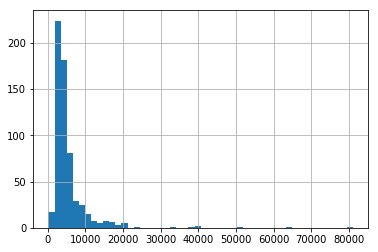

In [8]:
loan_train["ApplicantIncome"].hist(bins=50)
plt.show()

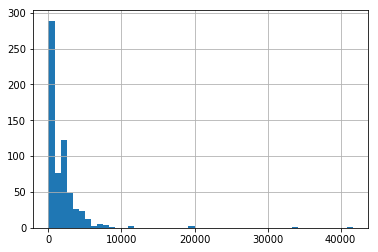

In [9]:
loan_train["CoapplicantIncome"].hist(bins=50)
plt.show()

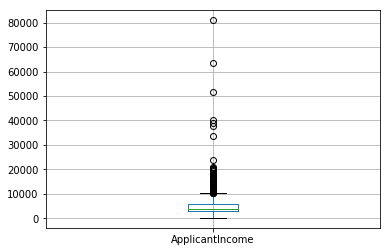

In [10]:
loan_train.boxplot(column='ApplicantIncome')
plt.show()
#confirms the presence of outliers/ extreme values 
#points located farther most are the extreme values
# there is a lot of disparity in income values due to different education levels

C:\Users\Simran\Anaconda2\envs\py3k\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


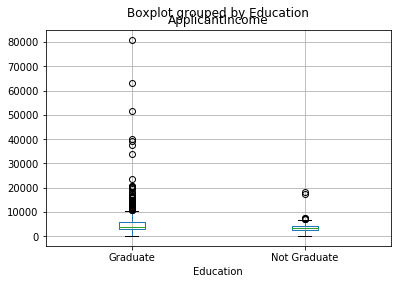

In [11]:
loan_train.boxplot(column='ApplicantIncome',by='Education')
plt.show()
#maximum disparity is amongst people who are graduate, which may be due to graduation, post graduation and phd levels

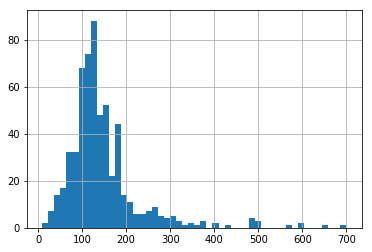

In [12]:
loan_train["LoanAmount"].hist(bins=50)
plt.show()

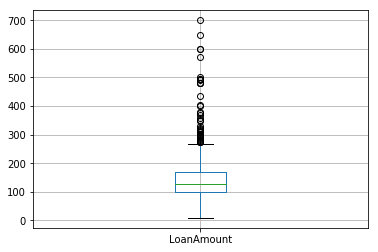

In [13]:
loan_train.boxplot(column='LoanAmount')
plt.show()
#outliers and missing values in this variable
#Data Munging (Data cleaning in these two variables is required)


In [14]:
var1=loan_train["Credit_History"].value_counts()
print("Frequency Table for Credit History :")
print(var1)
print(" ")
pivot_summary=loan_train.pivot_table(values="Loan_Status",index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print("Pivot Table Summary : Probability of getting a loan on the basis of availability of Credit History")
print(pivot_summary)

Frequency Table for Credit History :
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 
Pivot Table Summary : Probability of getting a loan on the basis of availability of Credit History
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


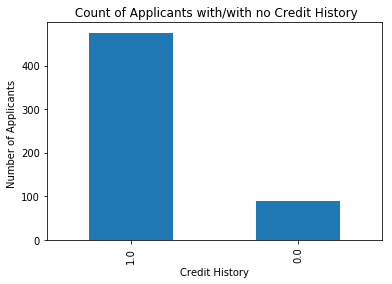

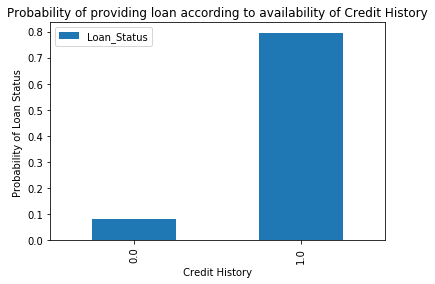

In [15]:
var1.plot(kind='bar')
plt.xlabel("Credit History")
plt.ylabel("Number of Applicants ")
plt.title(" Count of Applicants with/with no Credit History")
plt.show()

pivot_summary.plot(kind='bar')
plt.xlabel(" Credit History ")
plt.ylabel("Probability of Loan Status ")
plt.title("Probability of providing loan according to availability of Credit History")
plt.show()

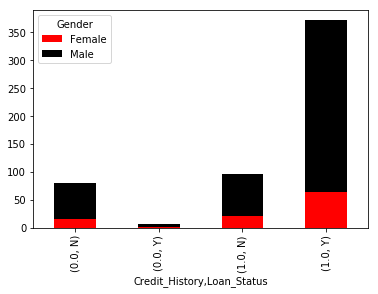

In [16]:
stacked_bar=pd.crosstab([loan_train['Credit_History'], loan_train['Loan_Status']],loan_train['Gender'])
stacked_bar.plot(kind='bar',grid=False,stacked=True,color=['Red','Black'])
plt.show()

In [17]:
loan_train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True)

In [19]:
loan_train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Simran\Anaconda2\envs\py3k\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


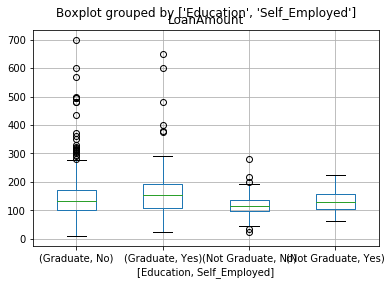

In [20]:
# stacked_bar=pd.crosstab([loan_train['Credit_History'], loan_train['Loan_Status']],loan_train['Gender'])
# stacked_bar.plot(kind='bar',grid=False,stacked=True,color=['Red','Black'])
loan_train.boxplot(column='LoanAmount',by=['Education','Self_Employed'])
plt.show()


In [21]:
loan_train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
loan_train['Self_Employed'].fillna("No",inplace=True)

In [23]:
table = loan_train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)


In [24]:
print (table.unstack())

Education     Self_Employed
Graduate      No               131.0
              Yes              152.0
Not Graduate  No               115.0
              Yes              130.0
dtype: float64


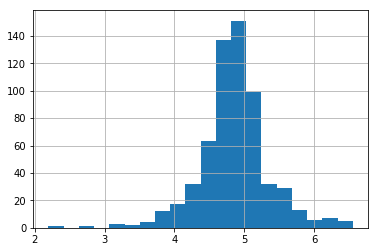

In [25]:
loan_train['LoanAmount_log'] = np.log(loan_train['LoanAmount'])
loan_train['LoanAmount_log'].hist(bins=20)
plt.show()

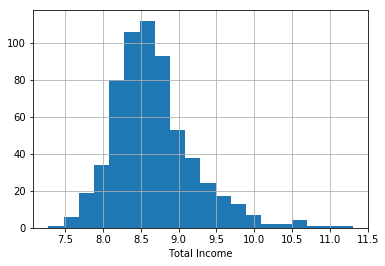

In [26]:
loan_train['TotalIncome'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']
loan_train['TotalIncome_log'] = np.log(loan_train['TotalIncome'])
loan_train['TotalIncome_log'].hist(bins=20) 
plt.xlabel("Total Income")
plt.show()

In [27]:
loan_train.drop(loan_train["Married"].isnull())
#dropping the null values becuase the number of null values is small i.e. 3 which can be ignored

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.000000,360.0,1.0,Urban,Y,4.248495,3900.0,8.268732
11,LP001027,Male,Yes,2,Graduate,No,2500,1840.0,109.000000,360.0,1.0,Urban,Y,4.691348,4340.0,8.375630


In [28]:
# if loan_train["Married"]==NaN:
#     loan_train.dropna(axis=0)
loan_train=loan_train[pd.notnull(loan_train["Married"])]

In [29]:
loan_train.shape
loan_train.apply(lambda x: sum(x.isnull()),axis=0)
#checking remaining null values of other variables

Loan_ID               0
Gender               13
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [30]:
loan_train["Gender"].value_counts()


Male      487
Female    111
Name: Gender, dtype: int64

In [31]:

loan_train["Credit_History"].value_counts()


loan_train["Dependents"].value_counts()
# loan_train["Education"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
loan_train["Gender"].mode()
# loan_train["Loan_Amount_Term"].mode()

# loan_train["Dependents"].mode()
# loan_train["Education"].mode()

0    Male
dtype: object

In [33]:
df=pd.DataFrame()
df["Gender"],df["Credit_History"]=loan_train["Gender"],loan_train["Credit_History"]


In [34]:
q1="SELECT Count(Credit_History),SUM(CASE WHEN Gender = 'Male' THEN 1 ELSE 0 END) as Male_count FROM df where Credit_History=1.0";

In [35]:
print(ps.sqldf(q1, locals()))

#finding interdependency between credit history and gender
#number of males with credit history 


   Count(Credit_History)  Male_count
0                    472         380


In [36]:
q3="SELECT * FROM loan_train where Credit_History=1.0 and Gender IS NULL";
#crosschecking null values for gender

In [37]:
print(ps.sqldf(q3, locals()))

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001448   None     Yes         3+  Graduate            No   
1  LP001585   None     Yes         3+  Graduate            No   
2  LP001644   None     Yes          0  Graduate           Yes   
3  LP002024   None     Yes          0  Graduate            No   
4  LP002103   None     Yes          1  Graduate           Yes   
5  LP002501   None     Yes          0  Graduate            No   
6  LP002625   None      No          0  Graduate            No   
7  LP002925   None      No          0  Graduate            No   
8  LP002933   None      No         3+  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            23803                0.0       370.0             360.0   
1            51763                0.0       700.0             300.0   
2              674             5296.0       168.0             360.0   
3             2473             1843.0       159.0             360

In [38]:
#Gender variable comprises of 80% of males, so we will fill null values in Gender with credit history (1 or yes) with 'male' 

for j in loan_train['Credit_History']:
    if j==1.0:
        loan_train['Gender'].fillna("Male",inplace=True)

In [39]:
df.apply(lambda x: sum(x.isnull()),axis=0)


Gender            13
Credit_History    50
dtype: int64

In [40]:
# filling null values in credit history with 1.0 where Gender is 'male' 

for k in loan_train['Gender']:
    if k=='Male':
        loan_train['Credit_History'].fillna(1.0,inplace=True)

In [41]:
q4="SELECT SUM(CASE WHEN Dependents=0 Then 1 Else 0 END) AS Count_DEP from loan_train where Education='Graduate' ";

In [42]:
print(ps.sqldf(q4, locals())) 
#Graduate people with 0 dependent count

   Count_DEP
0        275


In [43]:
loan_train["Loan_Amount_Term"].fillna(360,inplace=True)
#filling Loan Amount Term null values witht the mode of the variable

In [44]:
for l in loan_train["Education"]:
    if l=='Graduate':
        loan_train['Dependents'].fillna(0,inplace=True)
        
#Filling null values in Dependents variable
#Null values where Education is Graduate is filled with  value

In [45]:
# loan_train['Dependents'].map({'3+': 3})
loan_train['Dependents'].value_counts()
loan_train['Dependents'].isnull().sum()

0

In [46]:
loan_train.apply(lambda x:sum(x.isnull()),axis=0)
#none of the variables contain null values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [47]:
writer=pd.ExcelWriter('Final_loan_train.xlsx')
loan_train.to_excel(writer,'sheet1')

#Saving the output to excel file

In [48]:
#converting all the variables into categorical values

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for l in var_mod:
    loan_train[l] = le.fit_transform(loan_train['Loan_Status'])
loan_train[l].dtypes 

dtype('int64')

In [49]:
#Import models from scikit learn module:

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics



C:\Users\Simran\Anaconda2\envs\py3k\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    
  #Fit the model:
    model.fit(data[predictors],data[outcome])
  #Make predictions on training set:
  
    predictions = model.predict(data[predictors])
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])



In [51]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']

classification_model(model, loan_train,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [52]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['ApplicantIncome','CoapplicantIncome']

classification_model(model, loan_train,predictor_var,outcome_var)



Accuracy : 68.740%
Cross-Validation Score : 68.578%


In [53]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Education']

classification_model(model, loan_train,predictor_var,outcome_var)

#case of overfitting

Accuracy : 100.000%
Cross-Validation Score : 100.000%


In [54]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Property_Area']

classification_model(model, loan_train,predictor_var,outcome_var)
#case of overfitting

Accuracy : 100.000%
Cross-Validation Score : 100.000%


In [55]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['ApplicantIncome','CoapplicantIncome']
classification_model(model, loan_train,predictor_var,outcome_var)

#cross validation score went down - overfitting
#this model is good onlyfor this particular pattern/ trend becuase cross validation score is less

Accuracy : 98.527%
Cross-Validation Score : 56.289%


In [56]:

outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']

classification_model(model, loan_train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 100.000%


In [57]:

outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']

classification_model(model, loan_train,predictor_var,outcome_var)

Accuracy : 89.362%
Cross-Validation Score : 69.560%


In [60]:
###Random Forest can work with all the features and it returns a feature importance matrix which can be used to select features.

model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log','TotalIncome_log']
classification_model(model, loan_train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 100.000%


In [62]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

#features with their importance as values

Self_Employed       0.210000
Married             0.187118
Dependents          0.183424
Education           0.176659
Property_Area       0.120798
Gender              0.106639
Credit_History      0.014984
Loan_Amount_Term    0.000354
LoanAmount_log      0.000025
TotalIncome_log     0.000000
dtype: float64


In [66]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, loan_train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 100.000%
